<a href="https://colab.research.google.com/github/SeokHyeon-Hwang/programmerspython/blob/master/190301_Pra_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 캐글 또는 기본 데이터 셋을 이용하여 머신 러닝 기반 데이터 분석을 수행하고 해당 결과를 정리해서 제출해 주세요.

#### 제출 내용 : ppt 또는 워드 문서, 소스코드 또는 github 주소


#### 01 불러오기

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
%matplotlib inline

In [5]:
tr = pd.read_csv('train.csv')
te = pd.read_csv('test.csv')

tr.head()

id             date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000   221900.0         3       1.00         1180      5650   
1   1  20141209T000000   538000.0         3       2.25         2570      7242   
2   2  20141209T000000   604000.0         4       3.00         1960      5000   
3   3  20150218T000000   510000.0         3       2.00         1680      8080   
4   4  20140512T000000  1225000.0         4       4.50         5420    101930   

   floors  waterfront  view     ...      grade  sqft_above  sqft_basement  \
0     1.0           0     0     ...          7        1180              0   
1     2.0           0     0     ...          7        2170            400   
2     1.0           0     0     ...          7        1050            910   
3     1.0           0     0     ...          8        1680              0   
4     1.0           0     0     ...         11        3890           1530   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1965             0    98136  47.5208 -122.393           1360   
3      1987             0    98074  47.6168 -122.045           1800   
4      2001             0    98053  47.6561 -122.005           4760   

   sqft_lot15  
0        5650  
1        7639  
2        5000  
3        7503  
4      101930  

[5 rows x 21 columns]

In [17]:
te.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
0  15200  20140512T000000  1225000.0         4       4.50         5420   
1  15201  20150312T000000   323000.0         3       2.50         1890   
2  15202  20150124T000000   650000.0         4       3.00         2950   
3  15203  20141205T000000   189000.0         2       1.00         1200   
4  15204  20140514T000000   385000.0         4       1.75         1620   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0    101930     1.0           0     0     ...         11        3890   
1      6560     2.0           0     0     ...          7        1890   
2      5000     2.0           0     3     ...          9        1980   
3      9850     1.0           0     0     ...          7        1200   
4      4980     1.0           0     0     ...          7         860   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           1530      2001             0    98053  47.6561 -122.005   
1              0      2003             0    98038  47.3684 -122.031   
2            970      1979             0    98126  47.5714 -122.375   
3              0      1921             0    98002  47.3089 -122.210   
4            760      1947             0    98133  47.7025 -122.341   

   sqft_living15  sqft_lot15  
0           4760      101930  
1           2390        7570  
2           2140        4000  
3           1060        5095  
4           1400        4980  

[5 rows x 21 columns]

In [6]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15208 entries, 0 to 15207
Data columns (total 21 columns):
id               15208 non-null int64
date             15208 non-null object
price            15208 non-null float64
bedrooms         15208 non-null int64
bathrooms        15208 non-null float64
sqft_living      15208 non-null int64
sqft_lot         15208 non-null int64
floors           15208 non-null float64
waterfront       15208 non-null int64
view             15208 non-null int64
condition        15208 non-null int64
grade            15208 non-null int64
sqft_above       15208 non-null int64
sqft_basement    15208 non-null int64
yr_built         15208 non-null int64
yr_renovated     15208 non-null int64
zipcode          15208 non-null int64
lat              15208 non-null float64
long             15208 non-null float64
sqft_living15    15208 non-null int64
sqft_lot15       15208 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 2.4+ MB


In [7]:
te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6555 entries, 0 to 6554
Data columns (total 21 columns):
id               6555 non-null int64
date             6555 non-null object
price            6555 non-null float64
bedrooms         6555 non-null int64
bathrooms        6555 non-null float64
sqft_living      6555 non-null int64
sqft_lot         6555 non-null int64
floors           6555 non-null float64
waterfront       6555 non-null int64
view             6555 non-null int64
condition        6555 non-null int64
grade            6555 non-null int64
sqft_above       6555 non-null int64
sqft_basement    6555 non-null int64
yr_built         6555 non-null int64
yr_renovated     6555 non-null int64
zipcode          6555 non-null int64
lat              6555 non-null float64
long             6555 non-null float64
sqft_living15    6555 non-null int64
sqft_lot15       6555 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 1.1+ MB


In [9]:
tr.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  15208.000000  1.520800e+04  15208.000000  15208.000000  15208.000000   
mean    7603.500000  5.396375e+05      3.371581      2.115761   2079.250066   
std     4390.315782  3.673948e+05      0.944338      0.771572    918.677235   
min        0.000000  7.500000e+04      0.000000      0.000000    370.000000   
25%     3801.750000  3.200000e+05      3.000000      1.500000   1429.250000   
50%     7603.500000  4.500000e+05      3.000000      2.250000   1920.000000   
75%    11405.250000  6.435000e+05      4.000000      2.500000   2550.000000   
max    15207.000000  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  1.520800e+04  15208.000000  15208.000000  15208.000000  15208.000000   
mean   1.510784e+04      1.491616      0.007102      0.234153      3.414716   
std    4.176538e+04      0.539502      0.083974      0.764814      0.653653   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.026750e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.620000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.065125e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  15208.000000  15208.000000   15208.000000  15208.000000  15208.000000   
mean       7.652157   1785.225539     294.024527   1970.895910     84.138019   
std        1.176307    827.790976     444.464445     29.398459    401.121371   
min        3.000000    370.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     580.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4130.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  15208.000000  15208.000000  15208.000000   15208.000000   15208.000000  
mean   98078.417346     47.560386   -122.214892    1985.722712   12805.336139  
std       53.500779      0.138838      0.140058     686.362821   27901.058780  
min    98001.000000     47.155900   -122.519000     399.000000     660.000000  
25%    98033.000000     47.471100   -122.329000    1490.000000    5100.000000  
50%    98065.000000     47.571850   -122.232000    1840.000000    7619.500000  
75%    98118.000000     47.678700   -122.126000    2360.000000   10077.250000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [10]:
te.describe()

id         price     bedrooms    bathrooms  sqft_living  \
count   6555.000000  6.555000e+03  6555.000000  6555.000000  6555.000000   
mean   18477.000000  5.372258e+05     3.351640     2.093516  2064.500992   
std     1892.409839  3.531546e+05     0.921588     0.776235   913.819665   
min    15200.000000  8.000000e+04     0.000000     0.000000   290.000000   
25%    16838.500000  3.200000e+05     3.000000     1.500000  1400.000000   
50%    18477.000000  4.500000e+05     3.000000     2.250000  1880.000000   
75%    20115.500000  6.422250e+05     4.000000     2.500000  2550.000000   
max    21754.000000  3.850000e+06     9.000000     6.500000  7850.000000   

           sqft_lot       floors   waterfront         view    condition  \
count  6.555000e+03  6555.000000  6555.000000  6555.000000  6555.000000   
mean   1.490303e+04     1.489016     0.008848     0.232342     3.414493   
std    4.144576e+04     0.539656     0.093655     0.766552     0.658600   
min    5.200000e+02     1.000000     0.000000     0.000000     1.000000   
25%    5.000000e+03     1.000000     0.000000     0.000000     3.000000   
50%    7.587000e+03     1.500000     0.000000     0.000000     3.000000   
75%    1.063850e+04     2.000000     0.000000     0.000000     4.000000   
max    1.074218e+06     3.500000     1.000000     4.000000     5.000000   

             grade   sqft_above  sqft_basement     yr_built  yr_renovated  \
count  6555.000000  6555.000000    6555.000000  6555.000000   6555.000000   
mean      7.639969  1778.594813     285.906178  1970.349047     84.316095   
std       1.173162   833.745769     437.225295    29.570353    401.445758   
min       1.000000   290.000000       0.000000  1900.000000      0.000000   
25%       7.000000  1180.000000       0.000000  1950.000000      0.000000   
50%       7.000000  1540.000000       0.000000  1974.000000      0.000000   
75%       8.000000  2180.000000     550.000000  1996.000000      0.000000   
max      13.000000  7850.000000    3260.000000  2015.000000   2015.000000   

            zipcode          lat         long  sqft_living15     sqft_lot15  
count   6555.000000  6555.000000  6555.000000    6555.000000    6555.000000  
mean   98079.464226    47.561815  -122.215813    1980.380168   12291.057818  
std       53.437620     0.137401     0.140111     699.981030   25520.455731  
min    98001.000000    47.159300  -122.515000     399.000000     750.000000  
25%    98033.000000    47.475100  -122.331000    1460.000000    5027.000000  
50%    98072.000000    47.572300  -122.236000    1820.000000    7591.000000  
75%    98118.000000    47.677500  -122.125000    2360.000000   10000.000000  
max    98199.000000    47.777600  -121.315000    6210.000000  858132.000000

In [12]:
tr.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [13]:
te.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
tr.shape

(15208, 21)

In [16]:
te.shape

(6555, 21)

#### 02 시각화

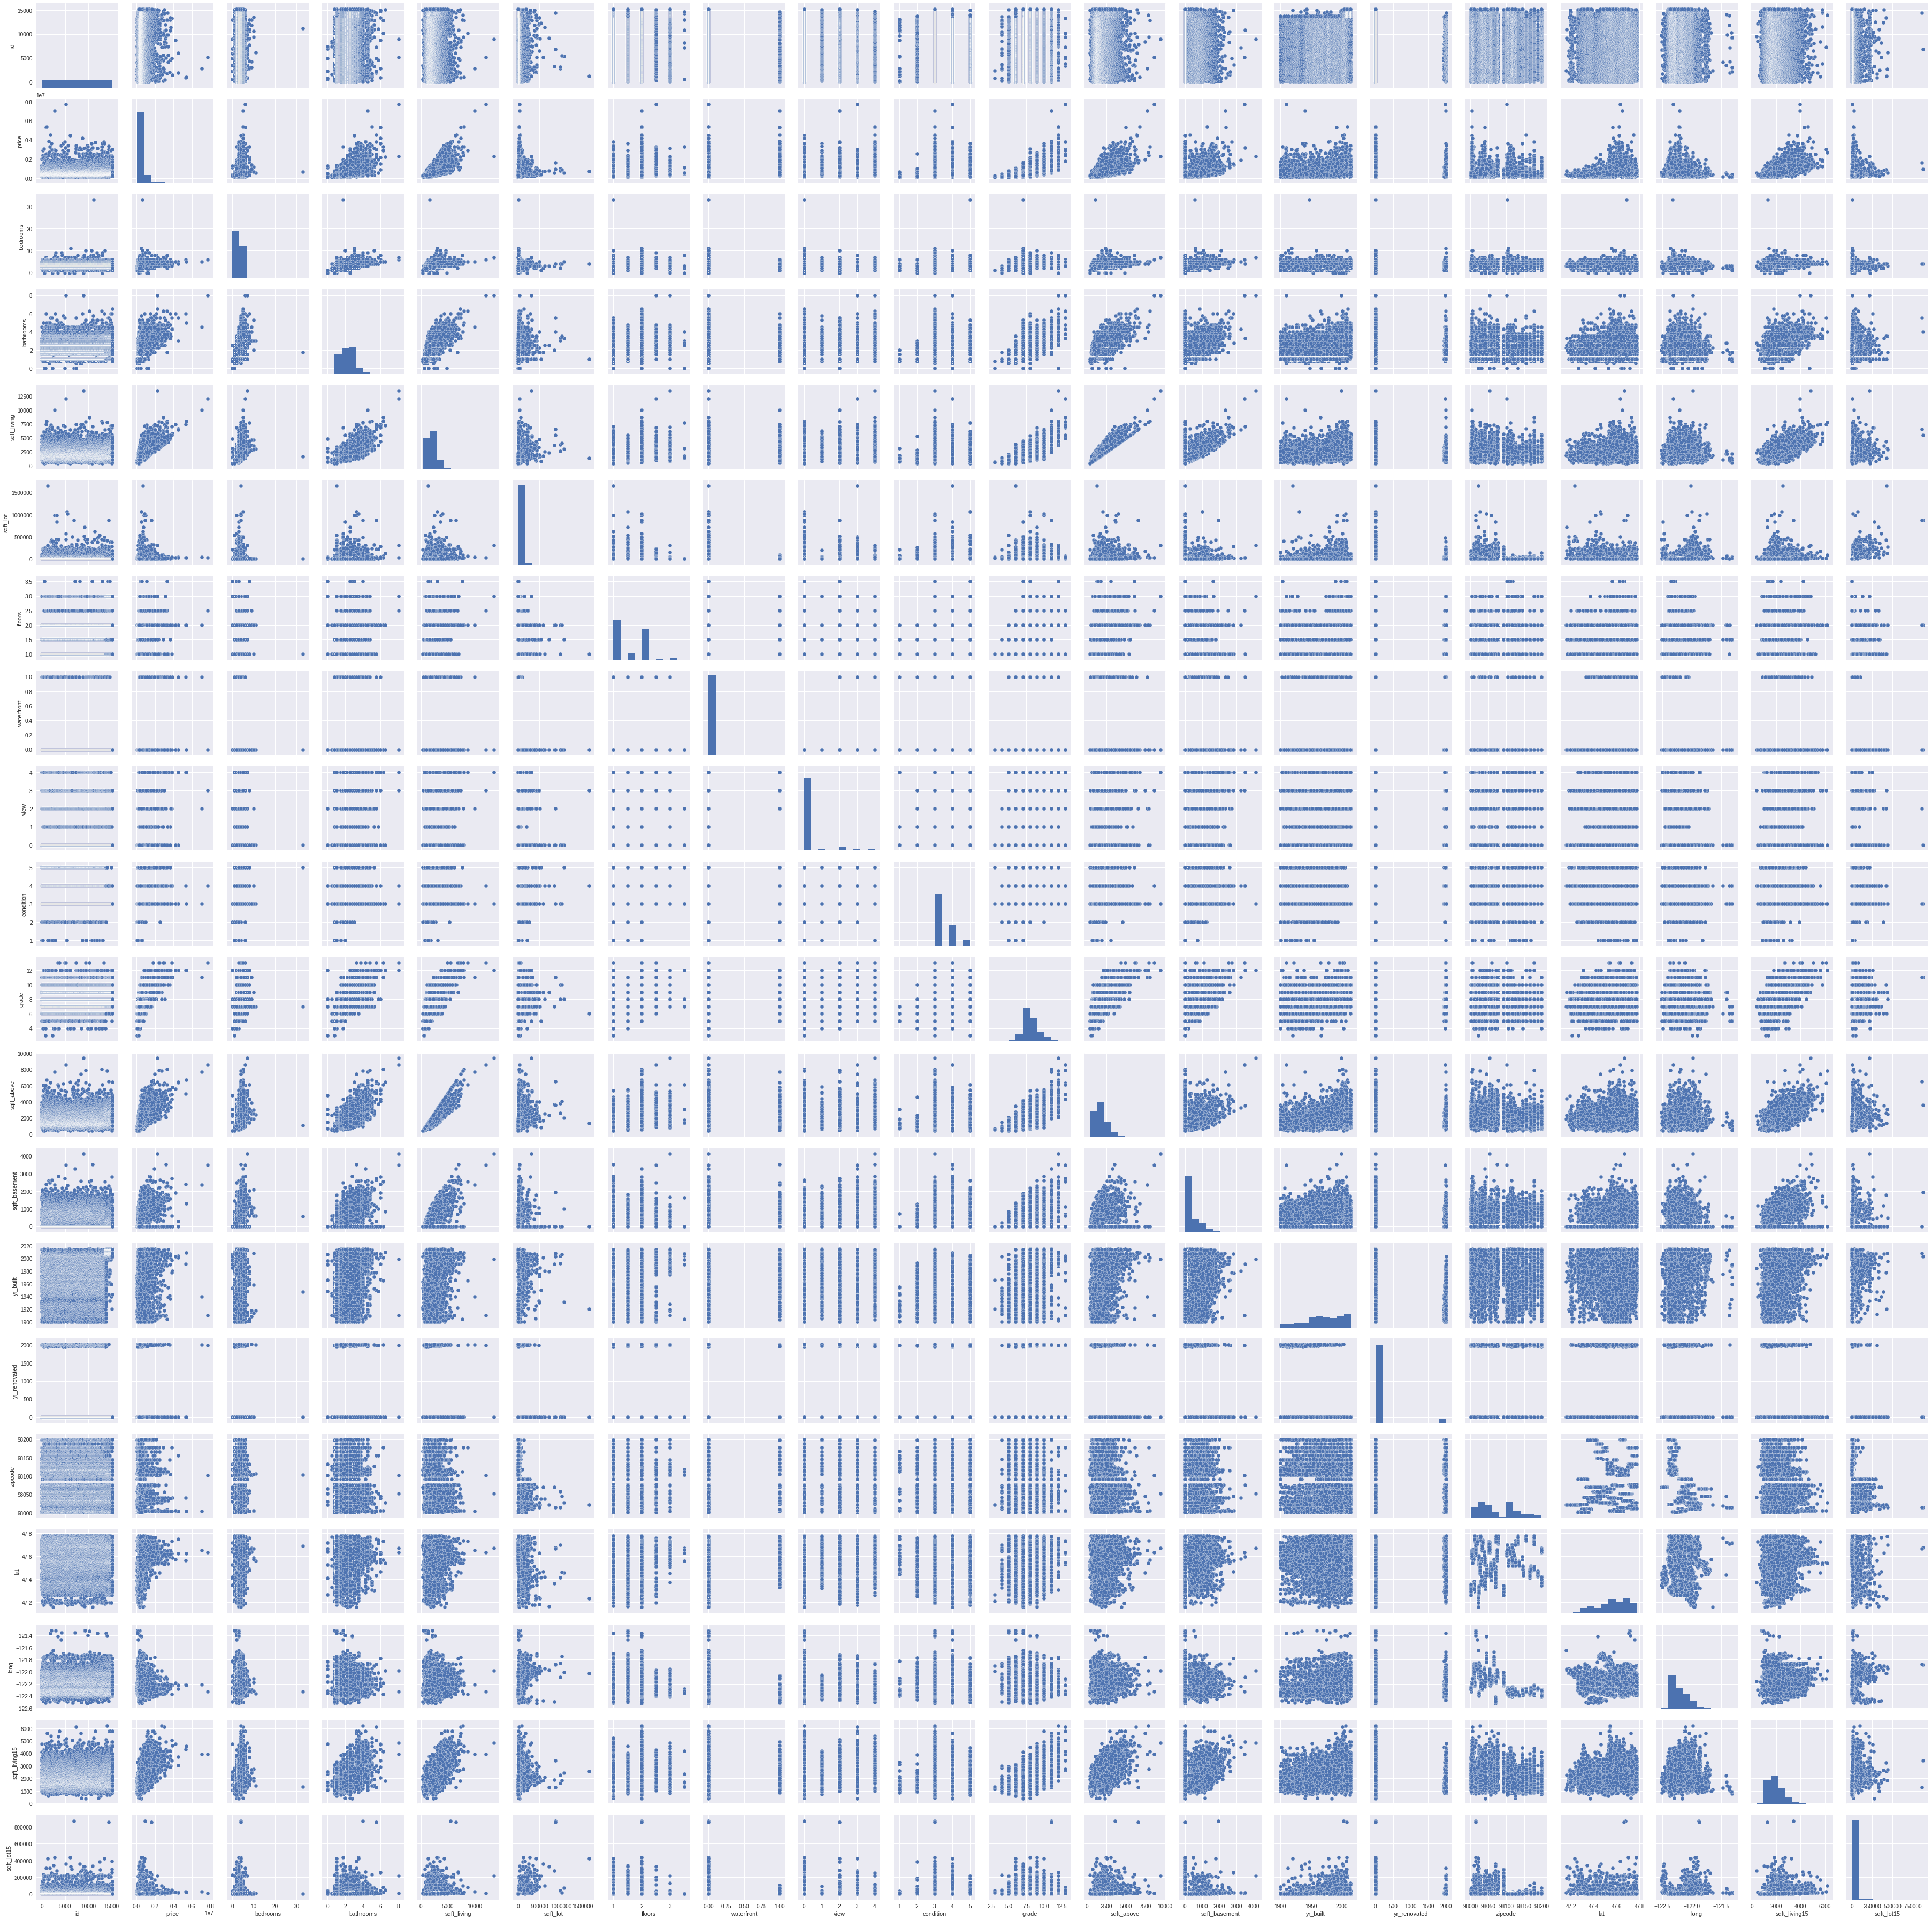

In [18]:
sns.pairplot(tr)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


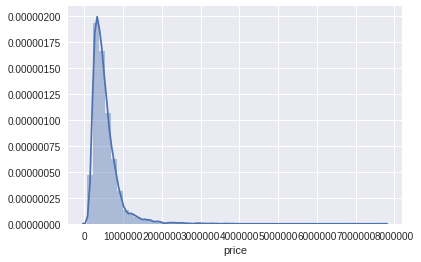

In [19]:
sns.distplot(tr['price'])

#### correlation

In [20]:
tr.corr()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.025749  0.009655   0.107698     0.041610 -0.027289   
price          0.025749  1.000000  0.305682   0.526900     0.703226  0.087228   
bedrooms       0.009655  0.305682  1.000000   0.512589     0.569478  0.039488   
bathrooms      0.107698  0.526900  0.512589   1.000000     0.751497  0.094212   
sqft_living    0.041610  0.703226  0.569478   0.751497     1.000000  0.178813   
sqft_lot      -0.027289  0.087228  0.039488   0.094212     0.178813  1.000000   
floors         0.181448  0.266110  0.172039   0.504414     0.354541 -0.001588   
waterfront    -0.011536  0.272579 -0.006742   0.065461     0.111313  0.012633   
view          -0.012918  0.404582  0.080742   0.194207     0.292829  0.074569   
condition     -0.094626  0.038446  0.031687  -0.117231    -0.053039 -0.001772   
grade          0.080835  0.669244  0.351321   0.663321     0.762201  0.111874   
sqft_above     0.072449  0.606567  0.470282   0.681341     0.875546  0.189401   
sqft_basement -0.048928  0.323820  0.301197   0.284331     0.436274  0.016845   
yr_built       0.203266  0.051072  0.152038   0.503029     0.316007  0.057435   
yr_renovated  -0.025825  0.122364  0.018902   0.054352     0.055042  0.003194   
zipcode       -0.008743 -0.048639 -0.148237  -0.200010    -0.197312 -0.129746   
lat            0.002055  0.307125 -0.010576   0.028537     0.053525 -0.088012   
long           0.010678  0.017397  0.125499   0.216453     0.237814  0.226591   
sqft_living15  0.023212  0.585733  0.383481   0.565733     0.757680  0.145938   
sqft_lot15    -0.027889  0.084628  0.036842   0.096685     0.193703  0.726757   

                 floors  waterfront      view  condition     grade  \
id             0.181448   -0.011536 -0.012918  -0.094626  0.080835   
price          0.266110    0.272579  0.404582   0.038446  0.669244   
bedrooms       0.172039   -0.006742  0.080742   0.031687  0.351321   
bathrooms      0.504414    0.065461  0.194207  -0.117231  0.663321   
sqft_living    0.354541    0.111313  0.292829  -0.053039  0.762201   
sqft_lot      -0.001588    0.012633  0.074569  -0.001772  0.111874   
floors         1.000000    0.035425  0.038704  -0.260526  0.456254   
waterfront     0.035425    1.000000  0.391859   0.012233  0.097573   
view           0.038704    0.391859  1.000000   0.045144  0.263186   
condition     -0.260526    0.012233  0.045144   1.000000 -0.143437   
grade          0.456254    0.097573  0.263186  -0.143437  1.000000   
sqft_above     0.525980    0.083253  0.174275  -0.155351  0.752589   
sqft_basement -0.246797    0.075022  0.280680   0.179705  0.173760   
yr_built       0.490417   -0.017201 -0.044941  -0.357132  0.445311   
yr_renovated   0.006692    0.094939  0.096126  -0.063466  0.014036   
zipcode       -0.065156    0.024633  0.078567   0.000496 -0.185074   
lat            0.052634   -0.012664  0.011474  -0.014842  0.114358   
long           0.123263   -0.035010 -0.078047  -0.102547  0.192987   
sqft_living15  0.280045    0.089017  0.283536  -0.090750  0.711882   
sqft_lot15    -0.004004    0.023608  0.073581   0.001173  0.119812   

               sqft_above  sqft_basement  yr_built  yr_renovated   zipcode  \
id               0.072449      -0.048928  0.203266     -0.025825 -0.008743   
price            0.606567       0.323820  0.051072      0.122364 -0.048639   
bedrooms         0.470282       0.301197  0.152038      0.018902 -0.148237   
bathrooms        0.681341       0.284331  0.503029      0.054352 -0.200010   
sqft_living      0.875546       0.436274  0.316007      0.055042 -0.197312   
sqft_lot         0.189401       0.016845  0.057435      0.003194 -0.129746   
floors           0.525980      -0.246797  0.490417      0.006692 -0.065156   
waterfront       0.083253       0.075022 -0.017201      0.094939  0.024633   
view             0.174275       0.280680 -0.044941      0.096126  0.078567   
condition       -0.155351       0.179705 -0.357132     -0.063466  0.

## [기본 기준] 데이터 나누기
[기본항목 2-2] 5점
훈련 데이터 및 평가 데이터를 나눠서 데이터 분석을 수행해
주세요.

#### Train Test Split

In [0]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

#### split을 사용하지 않고 이미 나눠진 train, test 데이터를 사용할것.

In [0]:
X_train = tr[['view', 'lat', 'long',
               'grade', 'condition']]
y_train = tr['price']
X_test = te[['view', 'lat', 'long',
               'grade', 'condition']]
y_test = te['price']

## [머신러닝 기법 적용]
[기본항목 3-1, 3-4] 각 2.5점
(가) 모델이 회귀인지 분류인지 확인하고 머신러닝 기법을
적용해 주세요.

#### -> price 값을 구하는 회귀 모델을 적용해야 한다.

#### Training a Linear Regression Model

#### Creating and Training the Model

In [59]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Predictions from our Model

In [0]:
predictions = lm.predict(X_test)

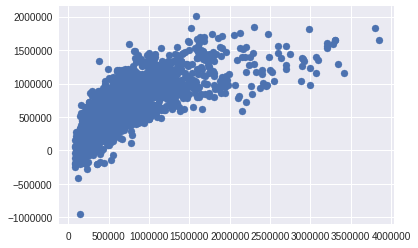

In [61]:
plt.scatter(y_test,predictions)

## [머신러닝 기법 적용]
[기본항목 3-1, 3-4] 각 2.5점
(나) 예측 모델을 위한 기본 머신 러닝 기법 이외의 앙상블
모형을포함한 머신 러닝 기법을 적용해 주세요.
(앙상블 기법을 포함한 다양한 머신 러닝 기법을 적용해 보기)

#### randomforest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [31]:
regr = RandomForestRegressor(max_depth=2, random_state=0,
                              n_estimators=100)

regr.fit(X, y)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [32]:
print(regr.feature_importances_)

[0.0012974  0.13552168 0.00448789 0.85869302 0.        ]


## [모델 평가] 총 10점
[기본항목 5-1, 5-2] 각 2.5점
(가) 위에서 수행한 모델에 대한 모델 성능 평가를 수행해
주세요.

(나) 선정한 평가 메트릭(정확도, F-measure, MSE 등)을 계산해
보고 이에 대한 의미를 적어보세요.

#### RMSE

In [62]:
len(predictions)

6555

In [64]:
len(y_test)

6555

In [66]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

227035.4713283967

#### -> rmse 값이 227,035로 나옴을 확인.

## [기본항목 5-3] 5점
(다) 모델 성능 평가 기준으로 다양한 방법을 통해 모델 성능
개선을 수행해 주세요.(파생변수 생성, 모델 변경, 샘플링 등)

#### 다른 변수를 추가한 모델 만들기

In [0]:
X_train = tr.drop(['price', 'date'], axis=1)
y_train = tr['price']
X_test = te.drop(['price', 'date'], axis=1)
y_test = te['price']

In [72]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
predictions = lm.predict(X_test)

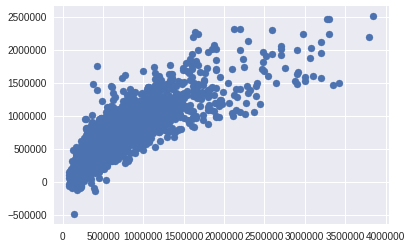

In [74]:
plt.scatter(y_test,predictions)

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

191052.9272327685

#### -> 문자가 있는 date 컬럼을 제외하고 변수를 다 썼더니 rmse가 191,052로 낮아졌다.

#### sqft_living, grade 컬럼 만 넣어서 linear regression 모델 다시 만들기

In [0]:
X_train = tr[['sqft_living', 'grade']]
y_train = tr['price']
X_test = te[['sqft_living', 'grade']]
y_test = te['price']

In [77]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
predictions = lm.predict(X_test)

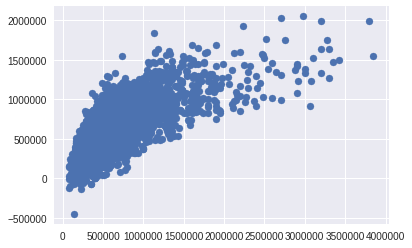

In [79]:
plt.scatter(y_test,predictions)

In [80]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

239861.21510869206

#### -> rmse가 239,861로 date 제외한 모든 변수를 썼을 때 보다 높아졌다. 

#### randomforest 모델 + date 제외한 모든 변수

In [0]:
X_train = tr.drop(['price', 'date'], axis=1)
y_train = tr['price']
X_test = te.drop(['price', 'date'], axis=1)
y_test = te['price']

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [87]:
#regr = RandomForestRegressor(max_depth=2, random_state=0,
#                              n_estimators=100)

regr = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
predictions = regr.predict(X_test)

In [91]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, predictions))
rmse

234166.34710268714

#### -> rmse는 234,166으로 더 높아졌다.

## 결론 : 
* linear ligression + 'data' 컬럼을 제외한 모든 변수를 사용 한 모델이 현재까지 가장 좋은 점수를 보여줬다. 이는 유의한 변수가 더 많이 포함되었기 때문이라고 유추할 수 있다.

*  임의 변수 5개를 사용한 경우가 상관계수가 높은 변수 2개를 사용한 모델보다 좋은 결과를 보여줬다. 이를 통해 상관계수가 높은 특정 변수 몇개가 좋은 모델을 만들어주는 것은 아님을 알 수 있었다.
* 임의 변수 5개 사용 모델에서 feature importance를 찍어본 결과 grade가 0.85가 나옴을 확인했고, 핵심 변수임을 다시금 확인 할 수 있었다.

